In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# loading data
df = pd.read_csv('datasets/salary_dataset.csv')

# separate data columns as x and target
x_train = df.iloc[:,1].to_numpy()
y_train = df.iloc[:,2].to_numpy()

# check wheter any data point has been missing
print(x_train.shape[0] == y_train.shape[0])

### Function to calculate Slope of a Linear Model

In [ ]:
def calc_slope(x, y):
    x_arr = np.array(x)
    y_arr = np.array(y)
    if not len(x_arr) == len(y_arr):
        return None
    else:
        n = x.shape[0]
        sm_x = sum(x_arr)
        nominator = n * np.sum(x_arr * y_arr) - (np.sum(x_arr) * (np.sum(y_arr)))
        denominator = n * np.sum(x_arr ** 2) - (sm_x ** 2)
        return nominator / denominator
    
x_train_arr = np.array([4,8,11,16,17])
y_train_arr = np.array([14,21,26,30,32])

slp = calc_slope(x_train, y_train)


### Function to calculate Y-intercept of a Linear Model

In [ ]:
def calc_y_intercept(x, y): 
    x_arr = np.array(x)
    y_arr = np.array(y)
    if not len(x_arr) == len(y_arr):
        return None
    else:
        slope = calc_slope(x_arr, y_arr)
        nominator = np.sum(y_arr) - slope * (np.sum(x_arr))

        return nominator / len(x_arr)

y_intercept = calc_y_intercept(x_train, y_train)


### Primary Regression Function

In [ ]:
def linear_regression(x_train, w , b):
    m = x_train.shape[0]
    f_wb = np.zeros(m)
    for i in range(m): 
        f_wb[i] = w * x_train[i] + b
    
    return f_wb

predictions = linear_regression(x_train, slp, y_intercept)

### Function to Calculate the Cost(accuracy) of the Model

In [ ]:
def squared_cost_function(y_predict, y_true):
    squared_errors = (y_predict - y_true) ** 2
    mse = np.mean(squared_errors)

    return mse

y_pr = np.array([46,50,54,64,70])
y_main = np.array([45,47,52,60,66])
mse_result = squared_cost_function(y_pr, y_main)

### Using Model Generated in Order to Predict New , Unseen Data

In [ ]:
def predict_new(x_point, b=y_intercept, w=slp):
    return (w * x_point) + b

y_pred = predict_new(7.)

### Plotting the Result

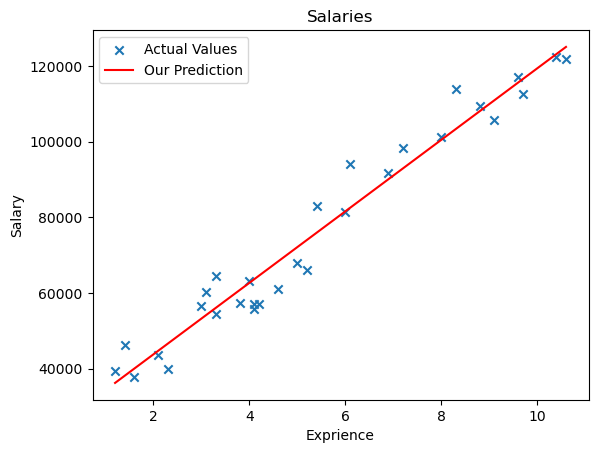

In [127]:
# plot the data to make sense of it.

plt.scatter(x_train, y_train,marker='x',label='Actual Values')
plt.plot(x_train, predictions, c='r',label='Our Prediction')
plt.title("Salaries")
plt.xlabel('Exprience')
plt.ylabel('Salary')
plt.legend()
plt.show()